In [ ]:
#계절별로 어느국가가 많이 방문하는지 알아보기위한 앱, 클러스터링
#18~(20년부터 22년 코로나기간 제외)~24년, 25,26년(예측데이터)까지의 데이터를 이용하여 클러스터링

In [ ]:
#데이터 로드
import pandas as pd
df_china=pd.read_csv('data/df_china_XGB.csv')
df_others=pd.read_csv('data/df_top14_prophet.csv')

In [4]:
df_china

,년,월,국적지역,입국자수
0,2018,1,중국,322446
1,2018,2,중국,367017
2,2018,3,중국,427618
3,2018,4,중국,385386
4,2018,5,중국,389044
...,...,...,...,...
67,2026,8,중국,470717
68,2026,9,중국,524321
69,2026,10,중국,445045
70,2026,11,중국,411989


In [5]:
df_others

,국적지역,년,월,입국자수
0,대만,2018,1,69550
1,대만,2018,2,79099
2,대만,2018,3,89247
3,대만,2018,4,99119
4,대만,2018,5,90267
...,...,...,...,...
1000,홍콩,2026,8,37816
1001,홍콩,2026,9,32457
1002,홍콩,2026,10,39486
1003,홍콩,2026,11,33339


In [8]:
#df_other, df_china를 합침
df=pd.concat([df_china,df_others]).reset_index(drop=True)

In [9]:
df

,년,월,국적지역,입국자수
0,2018,1,중국,322446
1,2018,2,중국,367017
2,2018,3,중국,427618
3,2018,4,중국,385386
4,2018,5,중국,389044
...,...,...,...,...
1072,2026,8,홍콩,37816
1073,2026,9,홍콩,32457
1074,2026,10,홍콩,39486
1075,2026,11,홍콩,33339


In [10]:
df.to_csv('data/df_total.csv',index=False)

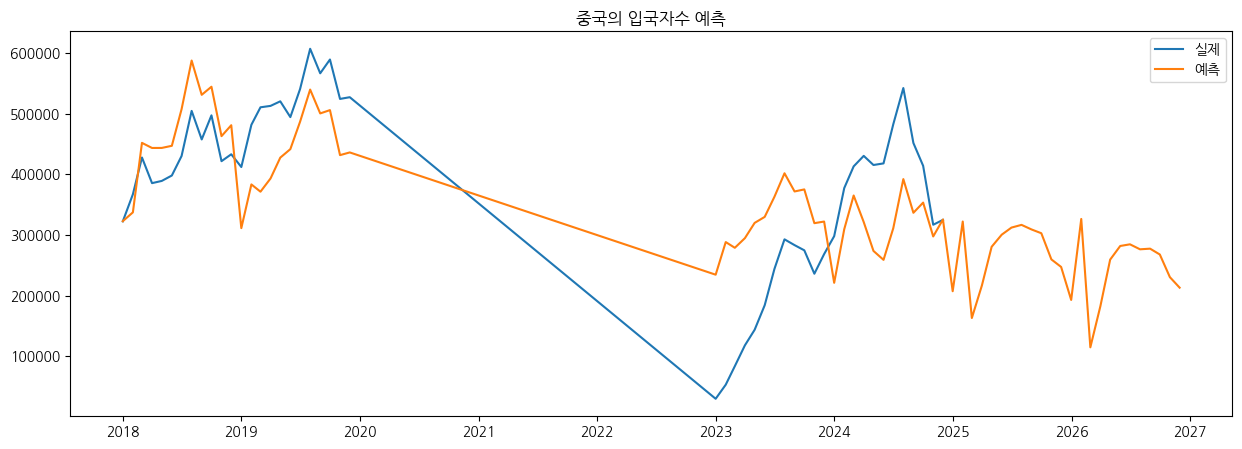

In [ ]:
#그래프로 확인
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

plt.rcParams['font.family'] = 'NanumGothic'  # 리눅스에서 한글 폰트 사용
plt.rcParams['axes.unicode_minus'] = False  # 마이너스 기호 깨짐 방지

# 선택국가의 입국자수 예측 결과만 추출
select_country = "중국"
forecast_select= final_forecast_df[final_forecast_df["국적지역"] == select_country]

# 실제 데이터와 예측 결과 그래프로 비교
plt.figure(figsize=(15, 5))

# 실제 데이터
plt.plot(df[df["국적지역"] == select_country]["날짜"], df[df["국적지역"] == select_country]["입국자수"], label="실제")

# 예측 결과
plt.plot(forecast_select["ds"], forecast_select["yhat"], label="예측")  
plt.title(f"{select_country}의 입국자수 예측")
plt.legend()

plt.show()

In [213]:
df['국적지역'].unique()

array(['네덜란드', '네팔', '뉴질랜드', '대만', '독일', '러시아', '말레이시아', '멕시코', '몽골',
       '미국', '미얀마', '베트남', '스페인', '싱가포르', '영국', '오스트레일리아', '우즈베키스탄',
       '이탈리아', '인도', '인도네시아', '일본', '중국', '카자흐스탄', '캄보디아', '캐나다', '태국',
       '튀르키예', '프랑스', '필리핀', '홍콩'], dtype=object)

In [169]:
# 데이터 전처리
df['년'] = df['연도분기'].slice()
df['월'] = df['방문년월'].astype(str).str[4:].astype(int)

In [170]:
df

,국적지역,방문년월,입국자수,년,월,계절
0,네덜란드,202501,3945,2025,1,겨울
1,네덜란드,202502,4446,2025,2,겨울
2,네덜란드,202503,7102,2025,3,봄
3,네덜란드,202504,5964,2025,4,봄
4,네덜란드,202505,6031,2025,5,봄
...,...,...,...,...,...,...
715,홍콩,202608,92514,2026,8,여름
716,홍콩,202609,99970,2026,9,가을
717,홍콩,202610,109266,2026,10,가을
718,홍콩,202611,117038,2026,11,가을


In [171]:
seasonal_df = df.groupby(['국적지역', '계절'])['입국자수'].sum().unstack(fill_value=0)

In [172]:
seasonal_df

계절,가을,겨울,봄,여름
국적지역,,,,
네덜란드,43772,33398,42065,47566
네팔,21484,27121,20390,30945
뉴질랜드,36499,33695,31788,31306
대만,1285939,1137317,1319949,1202872
독일,127089,99820,126208,125770
러시아,163049,135976,167702,156225
말레이시아,276358,265044,244497,237715
멕시코,55302,44091,45154,49122
몽골,120741,109256,103243,122024


In [173]:
#컬럼순서 봄 여름 가을 겨울로 변경
seasonal_df = seasonal_df[['봄', '여름', '가을', '겨울']]

In [174]:
seasonal_df.to_csv('data/seasonal_df.csv', index=True)

In [175]:
seasonal_df.columns

Index(['봄', '여름', '가을', '겨울'], dtype='object', name='계절')

In [176]:
#한글 폰트 설정
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm


plt.rcParams['font.family'] = 'NanumGothic'  # 리눅스에서 한글 폰트 사용

# 마이너스 기호 깨짐 방지
plt.rcParams['axes.unicode_minus'] = False


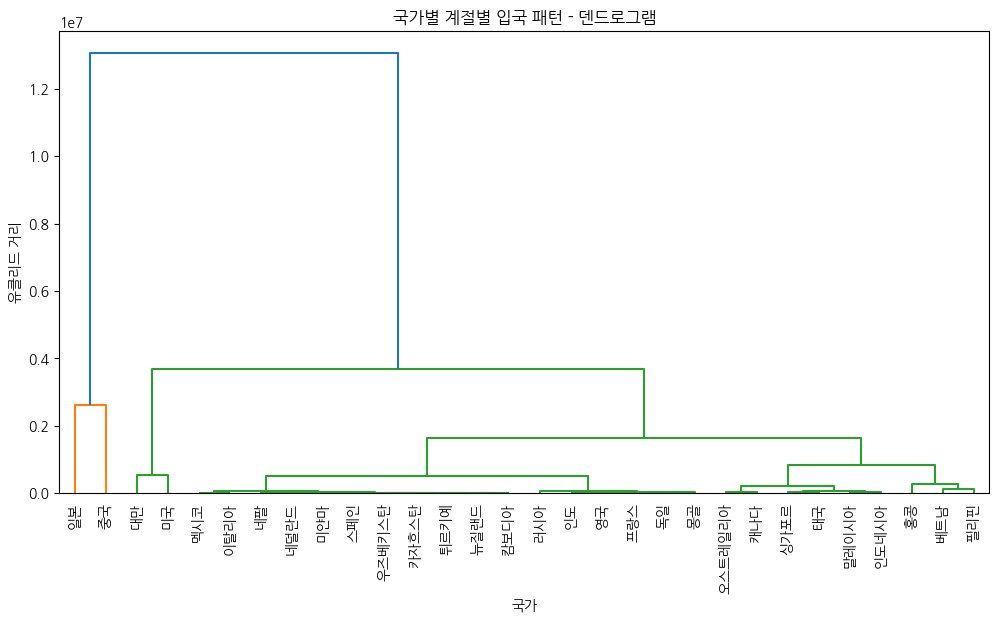

In [177]:
#덴드로그램 확인
from matplotlib import pyplot as plt
import scipy.cluster.hierarchy as sch
from scipy.cluster.hierarchy import linkage, dendrogram

# 계층적 클러스터링 수행
linkage_matrix = linkage(seasonal_df, method='ward')

plt.figure(figsize=(12, 6))
dendrogram(linkage_matrix, labels=seasonal_df.index, leaf_rotation=90, leaf_font_size=10)
plt.title('국가별 계절별 입국 패턴 - 덴드로그램')
plt.xlabel('국가')
plt.ylabel('유클리드 거리')
plt.savefig('image/seasonal_dendrogram.png')
plt.show()

In [178]:
# 5개 클러스터가 적절해보임

In [183]:
# 계층적 클러스터링 수행
from scipy.cluster.hierarchy import linkage, fcluster

linkage_matrix = linkage(seasonal_df, method='ward')
num_clusters = 5
clusters = fcluster(linkage_matrix, num_clusters, criterion='maxclust')
seasonal_df['클러스터'] = clusters

/var/folders/wz/cf10k4857715p70flsxw2g9m0000gn/T/ipykernel_15678/2565591907.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  seasonal_df['클러스터'] = clusters


In [184]:
seasonal_df

계절,봄,여름,가을,겨울,클러스터
국적지역,,,,,
네덜란드,42065,47566,43772,33398,4
네팔,20390,30945,21484,27121,4
뉴질랜드,31788,31306,36499,33695,4
대만,1319949,1202872,1285939,1137317,3
독일,126208,125770,127089,99820,4
러시아,167702,156225,163049,135976,4
말레이시아,244497,237715,276358,265044,5
멕시코,45154,49122,55302,44091,4
몽골,103243,122024,120741,109256,4


In [185]:
#seasonal_df 저장
seasonal_df.to_csv('data/seasonal_df.csv', index=True)

In [186]:
#1번 클러스터에 속한 국가들
seasonal_df[seasonal_df['클러스터'] == 1]


계절,봄,여름,가을,겨울,클러스터
국적지역,,,,,
일본,2944428,2926100,3241509,2655000,1


In [187]:
#2번 클러스터에 속한 국가들
seasonal_df[seasonal_df['클러스터'] == 2]

계절,봄,여름,가을,겨울,클러스터
국적지역,,,,,
중국,4133724,4369862,4510109,3972187,2


In [188]:
#3번 클러스터에 속한 국가들
seasonal_df[seasonal_df['클러스터'] == 3]

계절,봄,여름,가을,겨울,클러스터
국적지역,,,,,
대만,1319949,1202872,1285939,1137317,3
미국,1039674,1002547,1056241,796179,3


In [189]:
#4번 클러스터에 속한 국가들
seasonal_df[seasonal_df['클러스터'] == 4]

계절,봄,여름,가을,겨울,클러스터
국적지역,,,,,
네덜란드,42065,47566,43772,33398,4
네팔,20390,30945,21484,27121,4
뉴질랜드,31788,31306,36499,33695,4
독일,126208,125770,127089,99820,4
러시아,167702,156225,163049,135976,4
멕시코,45154,49122,55302,44091,4
몽골,103243,122024,120741,109256,4
미얀마,35144,44255,43198,35924,4
스페인,39625,40966,44052,31230,4


In [190]:
seasonal_df[seasonal_df['클러스터'] == 4].index

Index(['네덜란드', '네팔', '뉴질랜드', '독일', '러시아', '멕시코', '몽골', '미얀마', '스페인', '영국',
       '우즈베키스탄', '이탈리아', '인도', '카자흐스탄', '캄보디아', '튀르키예', '프랑스'],
      dtype='object', name='국적지역')

In [191]:
seasonal_df[seasonal_df['클러스터'] == 5]

계절,봄,여름,가을,겨울,클러스터
국적지역,,,,,
말레이시아,244497,237715,276358,265044,5
베트남,424980,468845,485312,406289,5
싱가포르,257287,210277,299801,254517,5
오스트레일리아,200468,190006,212052,196837,5
인도네시아,266093,266978,279658,249105,5
캐나다,206337,181935,213087,156539,5
태국,289524,214003,282649,263876,5
필리핀,366033,378967,404779,359889,5
홍콩,555712,478416,577224,463101,5


In [192]:
seasonal_df[seasonal_df['클러스터'] == 5].index

Index(['말레이시아', '베트남', '싱가포르', '오스트레일리아', '인도네시아', '캐나다', '태국', '필리핀', '홍콩'], dtype='object', name='국적지역')

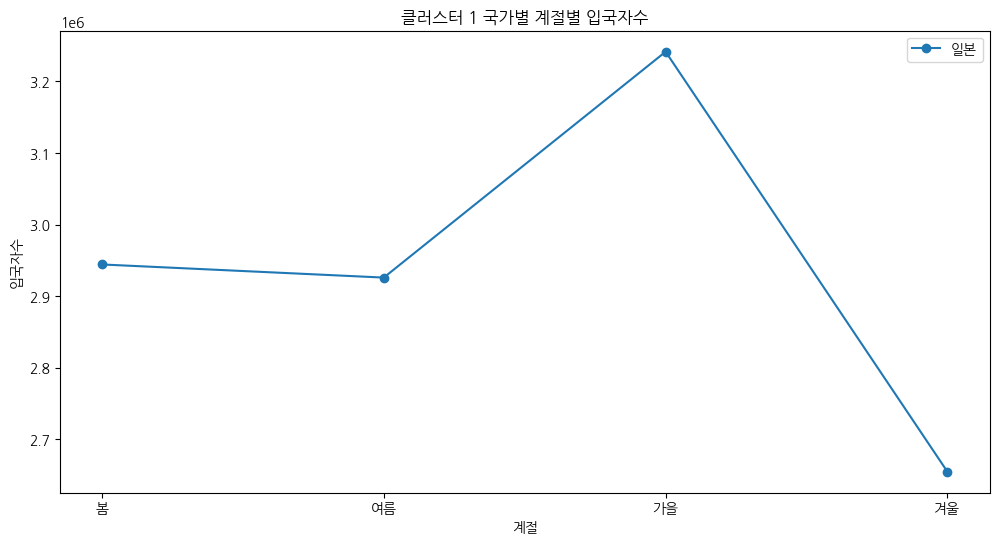

In [193]:
#클러스터별 분석
#클러스터 1
plt.figure(figsize=(12, 6))
plt.plot(seasonal_df[seasonal_df['클러스터'] == 1].T.drop('클러스터'), marker='o')
plt.title('클러스터 1 국가별 계절별 입국자수')
plt.ylabel('입국자수')
plt.xlabel('계절')
plt.legend(seasonal_df[seasonal_df['클러스터'] == 1].index)
plt.savefig('image/seasonal_cluster1.png')
plt.show()

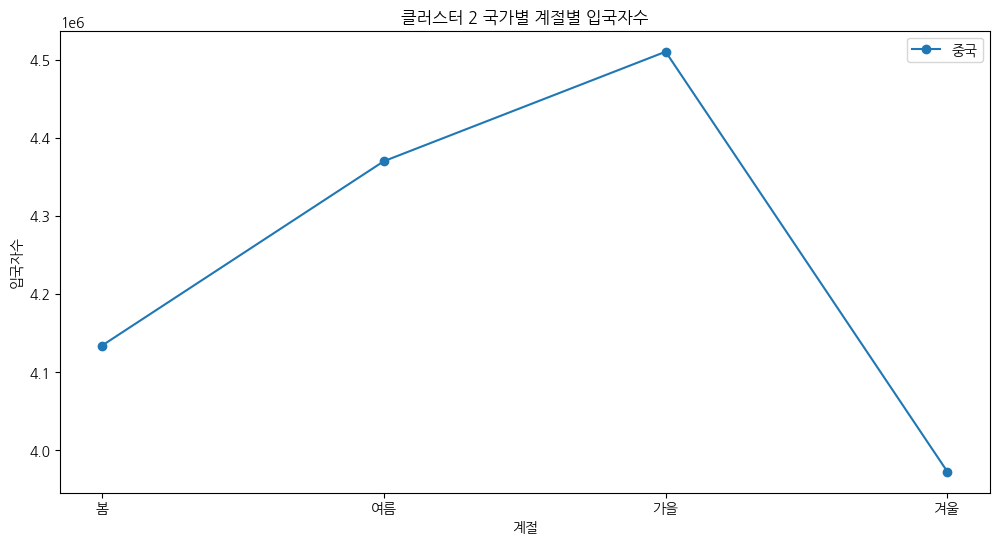

In [194]:
#클러스터 2
plt.figure(figsize=(12, 6))
plt.plot(seasonal_df[seasonal_df['클러스터'] == 2].T.drop('클러스터'), marker='o')
plt.title('클러스터 2 국가별 계절별 입국자수')
plt.ylabel('입국자수')
plt.xlabel('계절')
plt.legend(seasonal_df[seasonal_df['클러스터'] == 2].index)
plt.savefig('image/seasonal_cluster2.png')
plt.show()

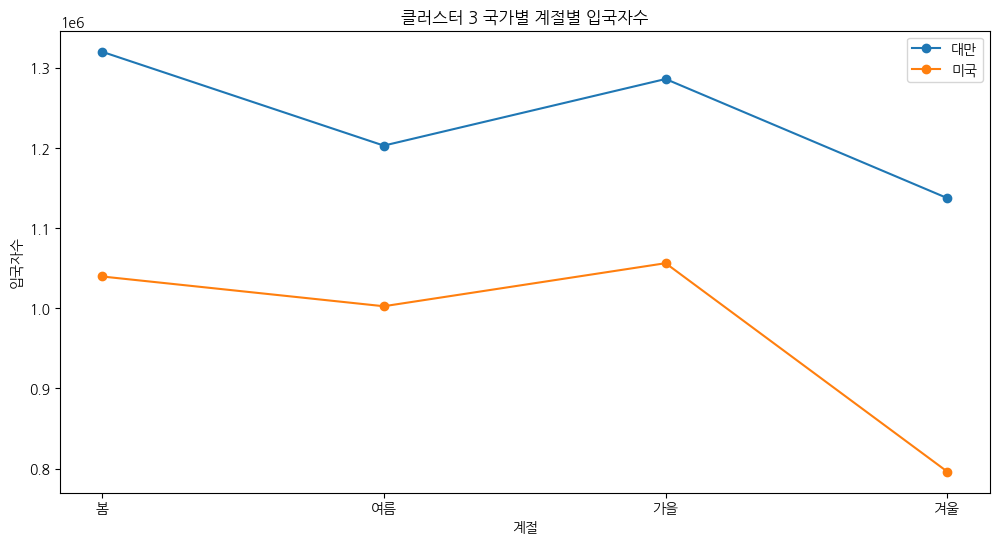

In [195]:
#클러스터 3
plt.figure(figsize=(12, 6))
plt.plot(seasonal_df[seasonal_df['클러스터'] == 3].T.drop('클러스터'), marker='o')
plt.title('클러스터 3 국가별 계절별 입국자수')
plt.ylabel('입국자수')
plt.xlabel('계절')
plt.legend(seasonal_df[seasonal_df['클러스터'] == 3].index)
plt.savefig('image/seasonal_cluster3.png')
plt.show()

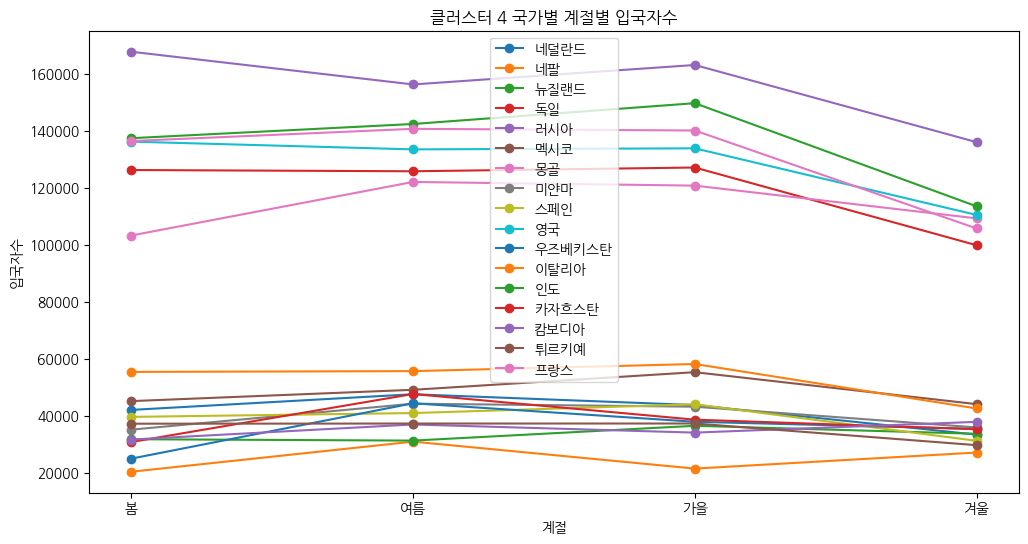

In [196]:
#클러스터 4
plt.figure(figsize=(12, 6))
plt.plot(seasonal_df[seasonal_df['클러스터'] == 4].T.drop('클러스터'), marker='o')
plt.title('클러스터 4 국가별 계절별 입국자수')
plt.ylabel('입국자수')
plt.xlabel('계절')
plt.legend(seasonal_df[seasonal_df['클러스터'] == 4].index)
plt.savefig('image/seasonal_cluster4.png')
plt.show()

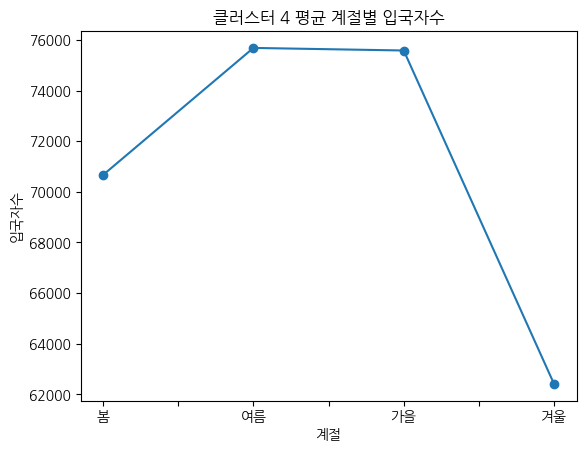

In [197]:
#클러스터4는 국가가 너무 많아 그래프가 보기 힘들어서 평균값으로 확인
seasonal_df[seasonal_df['클러스터'] == 4].drop(columns=['클러스터']).mean().plot(kind='line', marker='o')
plt.title('클러스터 4 평균 계절별 입국자수')
plt.ylabel('입국자수')
plt.xlabel('계절')
plt.savefig('image/seasonal_cluster4_mean.png')
plt.show()

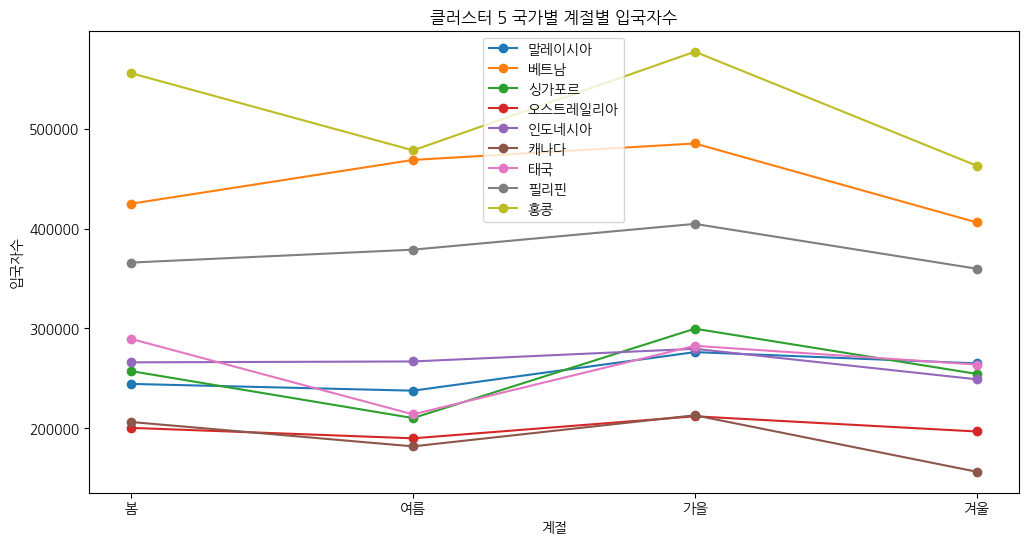

In [198]:
#클러스터 5
plt.figure(figsize=(12, 6))
plt.plot(seasonal_df[seasonal_df['클러스터'] == 5].T.drop('클러스터'), marker='o')
plt.title('클러스터 5 국가별 계절별 입국자수')
plt.ylabel('입국자수')
plt.xlabel('계절')
plt.legend(seasonal_df[seasonal_df['클러스터'] == 5].index)
plt.savefig('image/seasonal_cluster5.png')
plt.show()

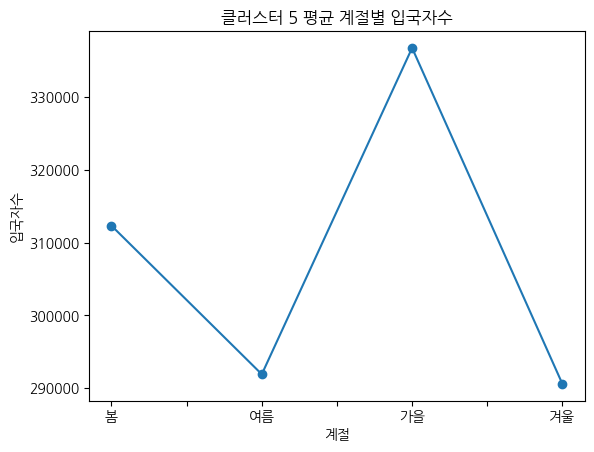

In [199]:
#클러스터 5도 평균값으로 봐보기
seasonal_df[seasonal_df['클러스터'] == 5].drop(columns=['클러스터']).mean().plot(kind='line', marker='o')
plt.title('클러스터 5 평균 계절별 입국자수')
plt.ylabel('입국자수')
plt.xlabel('계절')
plt.savefig('image/seasonal_cluster5_mean.png')
plt.show()